In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
import numpy as np
import re
import time

pd.set_option('display.max_row', 50)
pd.set_option('display.max_columns',50)

task=pd.read_csv('main_task.xlt')

In [2]:
task.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [3]:
task.columns=['Restaurant_id', 'City', 'CuisineStyle', 'Ranking', 'Rating',
       'PriceRange', 'NumberofReviews', 'Reviews', 'URL_TA', 'ID_TA']

In [4]:
print(f'{task.isnull().any().sum()} колонок содержат пустые значения.')

3 колонок содержат пустые значения.


Text(0.5, 1, 'Карта отсутствующих значений')

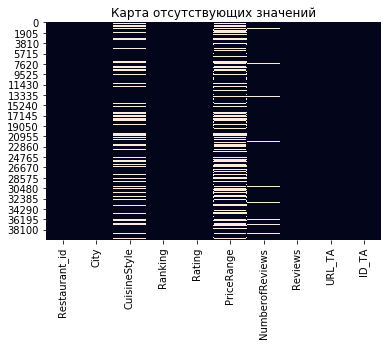

In [5]:
task.isnull().sum()
sns.heatmap(task.isnull(), cbar=False).set_title("Карта отсутствующих значений")

In [6]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_id    40000 non-null  object 
 1   City             40000 non-null  object 
 2   CuisineStyle     30717 non-null  object 
 3   Ranking          40000 non-null  float64
 4   Rating           40000 non-null  float64
 5   PriceRange       26114 non-null  object 
 6   NumberofReviews  37457 non-null  float64
 7   Reviews          40000 non-null  object 
 8   URL_TA           40000 non-null  object 
 9   ID_TA            40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
task=task.fillna("0")

# Предобработка City

In [8]:
task=pd.get_dummies(task, columns=['City'], dummy_na=True)

In [9]:
task

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,id_1535,0,1537.0,4.0,0,10,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,id_352,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_3456,0,3458.0,5.0,0,3,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
39996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39997,id_1649,"['Japanese', 'Sushi']",1652.0,4.5,0,4,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Предобработка Reviews

In [10]:
task.Reviews=task.Reviews.astype(str).apply(lambda x: x.replace('[]','no data'))
task.Reviews=task.Reviews.astype(str).apply(lambda x: x.replace('\\',"").replace("''","").replace("[","").replace("]",""))
task.Reviews=task.Reviews.apply(lambda x: x.split(','))

In [11]:
task

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,"['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,id_1535,0,1537.0,4.0,0,10,"['Unique cuisine', 'Delicious Nepalese food',...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,id_352,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688,"['Catch up with friends', 'Not exceptional', ...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_3456,0,3458.0,5.0,0,3,"[no data, no data]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84,"['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79,"['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
39996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542,"['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39997,id_1649,"['Japanese', 'Sushi']",1652.0,4.5,0,4,"['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70,"['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
task['ReviewTime']=task.Reviews.apply(lambda x: x[-1].strip())
task['ReviewTime']=task.ReviewTime.apply(lambda x: x.replace("[","").replace("]","").replace("'",""))
task['PublishTime']=task.Reviews.apply(lambda x: x[-2].strip())
task['PublishTime']=task.PublishTime.apply(lambda x: x.replace("[","").replace("]","").replace("'",""))

task['ReviewTime']=task.ReviewTime.apply(lambda x: x if "/2" in x else np.nan)
task['PublishTime']=task.PublishTime.apply(lambda x: x if "/2" in x else np.nan)


In [13]:
def resetReviews(s):
    review=''
    for x in s:
        if "/2" in x:
            continue
        else:
            review+=" "+x
    return review

task['Reviews'] = task.Reviews.apply(lambda x: resetReviews(x))
task

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ReviewTime,PublishTime
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,'Good food at your doorstep' 'A good hotel r...,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11/20/2017,12/31/2017
1,id_1535,0,1537.0,4.0,0,10,'Unique cuisine' 'Delicious Nepalese food',/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,06/19/2016,07/06/2017
2,id_352,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688,'Catch up with friends' 'Not exceptional',/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,01/06/2018,01/08/2018
3,id_3456,0,3458.0,5.0,0,3,no data no data,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,id_615,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84,'Best place to try a Bavarian food' 'Nice bu...,/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,02/19/2017,11/18/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79,'The real Italian experience!' 'Wonderful fo...,/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,11/12/2017,12/16/2017
39996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542,'Parisian atmosphere' 'Bit pricey but intere...,/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12/12/2017,12/21/2017
39997,id_1649,"['Japanese', 'Sushi']",1652.0,4.5,0,4,'Good by swedish standards' 'A hidden jewel ...,/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,04/12/2008,11/03/2016
39998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70,'Underground restaurant' 'Oldest Restaurant ...,/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,06/18/2017,07/11/2017


In [14]:
task.fillna(method='pad', inplace=True)
task

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ReviewTime,PublishTime
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,'Good food at your doorstep' 'A good hotel r...,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11/20/2017,12/31/2017
1,id_1535,0,1537.0,4.0,0,10,'Unique cuisine' 'Delicious Nepalese food',/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,06/19/2016,07/06/2017
2,id_352,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688,'Catch up with friends' 'Not exceptional',/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,01/06/2018,01/08/2018
3,id_3456,0,3458.0,5.0,0,3,no data no data,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,01/06/2018,01/08/2018
4,id_615,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84,'Best place to try a Bavarian food' 'Nice bu...,/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,02/19/2017,11/18/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79,'The real Italian experience!' 'Wonderful fo...,/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,11/12/2017,12/16/2017
39996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542,'Parisian atmosphere' 'Bit pricey but intere...,/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12/12/2017,12/21/2017
39997,id_1649,"['Japanese', 'Sushi']",1652.0,4.5,0,4,'Good by swedish standards' 'A hidden jewel ...,/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,04/12/2008,11/03/2016
39998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70,'Underground restaurant' 'Oldest Restaurant ...,/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,06/18/2017,07/11/2017


In [15]:
task['ReviewTime']=task.ReviewTime.apply(lambda x: time.mktime(datetime.datetime.strptime(str(x),"%m/%d/%Y").timetuple()))
task['PublishTime']=task.PublishTime.apply(lambda x: time.mktime(datetime.datetime.strptime(str(x),"%m/%d/%Y").timetuple()))
task.head(10)

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ReviewTime,PublishTime
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,'Good food at your doorstep' 'A good hotel r...,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.511125e+09,1.514668e+09
1,id_1535,0,1537.0,4.0,0,10,'Unique cuisine' 'Delicious Nepalese food',/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.466284e+09,1.499288e+09
2,id_352,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688,'Catch up with friends' 'Not exceptional',/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.515186e+09,1.515359e+09
3,id_3456,0,3458.0,5.0,0,3,no data no data,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.515186e+09,1.515359e+09
4,id_615,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84,'Best place to try a Bavarian food' 'Nice bu...,/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.487452e+09,1.510952e+09
5,id_1418,0,1419.0,3.0,0,2,'There are better 3 star hotel bars' 'Amazin...,/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.496178e+09,1.505509e+09
6,id_1720,"['Italian', 'Pizza']",1722.0,4.0,$,50,'Excellent simple local eatery.' 'Excellent ...,/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.509829e+09,1.501794e+09
7,id_825,['Italian'],826.0,3.0,0,9,'Wasting of money' 'excellent cuisine',/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.339535e+09,1.392498e+09
8,id_2690,0,2692.0,4.0,0,0,no data no data,/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.339535e+09,1.392498e+09
9,id_4209,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55,'Clean efficient staff' 'Nice little pizza t...,/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.490562e+09,1.510002e+09


In [17]:
great=["Delicious","Great","delicious","great","Wonderful", "wonderful", "Best", "best", "Excellent", "excellent"]
good=["Good","good","Nice","nice", "No bad", "no bad","Not bad","not bad"]
bad=["No","no","not", "Not", "bad", "Bad"]

def setMarksToREview(s):
    mark=0
    for st in s.split(","):
     #   print(s)
        if "no data" in st:         
            mark=0
            break
        for b in bad:
            if b in st:
                for gr in good:
                    if gr in st:
                        mark=mark+3.5
                  #      print(gr,\" mark=\",mark,\":\",st)\n",
                       # return mark\n",
                    else:
                   #     print(gr,\" mark=\",mark,\":\",st)\n",
                        mark=mark+(-1)
                       # return mark\n",
        for g in good:
            if g in st:
                mark=mark+3.5
            #    print(g,\" mark=\",mark,\":\",st)\n",
               # return mark\n",
        for gr in great:
            if gr in st:
                mark=mark+5
           #     print(gr,\" mark=\",mark,\":\",st)\n",
               # return mark        \n",
    else:
        return (mark)
        
  
task['ReviewsMark'] = task.Reviews.apply(lambda x: setMarksToREview(x))
task=task.fillna("0")
task

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ReviewTime,PublishTime,ReviewsMark
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,'Good food at your doorstep' 'A good hotel r...,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.511125e+09,1.514668e+09,7
1,id_1535,0,1537.0,4.0,0,10,'Unique cuisine' 'Delicious Nepalese food',/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.466284e+09,1.499288e+09,5
2,id_352,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688,'Catch up with friends' 'Not exceptional',/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.515186e+09,1.515359e+09,-16
3,id_3456,0,3458.0,5.0,0,3,no data no data,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.515186e+09,1.515359e+09,0
4,id_615,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84,'Best place to try a Bavarian food' 'Nice bu...,/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.487452e+09,1.510952e+09,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79,'The real Italian experience!' 'Wonderful fo...,/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.510434e+09,1.513372e+09,10
39996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542,'Parisian atmosphere' 'Bit pricey but intere...,/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.513026e+09,1.513804e+09,3.5
39997,id_1649,"['Japanese', 'Sushi']",1652.0,4.5,0,4,'Good by swedish standards' 'A hidden jewel ...,/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.207948e+09,1.478120e+09,3.5
39998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70,'Underground restaurant' 'Oldest Restaurant ...,/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.497733e+09,1.499720e+09,0


# Предобработка PriceRange

In [18]:
priceRange_dict={'0':0,'$':1, '$$ - $$$':2, '$$$$': 3}
task.PriceRange = task.PriceRange.replace(to_replace=priceRange_dict)

# Предобработка Cuisine Style

In [19]:
cuisines=set()
tpl = '^\d|&'
for recipe in task['CuisineStyle']:
    if recipe!=0:
        for r in recipe.split():
            if re.match(tpl, r) is None:
                cuisines.add(r.replace("[","").replace("]","").replace("'","").replace(",",""))
else:
    print(cuisines)

{'Nepali', 'Croatian', 'Latin', 'Hungarian', 'Italian', 'Jamaican', 'Filipino', 'American', 'Halal', 'Swedish', 'Danish', 'Lankan', 'Healthy', 'Pizza', 'Indian', 'Israeli', 'Albanian', 'Options', 'Cambodian', 'Singaporean', 'Korean', 'Xinjiang', 'Grill', 'Portuguese', 'Scandinavian', 'Central', 'Ecuadorean', 'Persian', 'Romanian', 'Canadian', 'Food', 'Bangladeshi', 'Zealand', 'Malaysian', 'Mexican', 'Fujian', 'Greek', 'Czech', 'Southwestern', 'South', 'Vegetarian', 'African', 'Salvadoran', 'Thai', 'Brazilian', 'Pakistani', 'Kosher', 'Polynesian', 'Peruvian', 'Eastern', 'Argentinean', 'Fast', 'Colombian', 'Dutch', 'French', 'Georgian', 'Balti', 'Irish', 'Uzbek', 'International', 'Barbecue', 'Afghani', 'Scottish', 'Creole', 'Sushi', 'Free', 'Hawaiian', 'Delicatessen', 'Austrian', 'Azerbaijani', 'Caucasian', 'Wine', 'Moroccan', 'Steakhouse', 'Soups', 'Friendly', 'Taiwanese', 'Asian', 'Diner', 'Turkish', 'Tunisian', 'Fusion', 'Vietnamese', 'Chinese', 'Slovenian', 'Lebanese', 'Norwegian', '

In [20]:
def find(x,y):
    if x in y:
        return 1
    else:
        return 0

for c in cuisines:
    task[c] = task.apply(lambda x: find(c, x['CuisineStyle']), axis = 1)

In [ ]:
task

In [21]:
task=task.drop(columns='CuisineStyle')
task=task.drop(columns='ID_TA')
task=task.drop(columns='Reviews')
task=task.drop(columns='URL_TA')

In [22]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = task.drop(['Restaurant_id', 'Rating'], axis = 1)  
y = task['Rating']  
     
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

In [ ]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
print(task)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
